In [ ]:
#this data was aquired using a csv file from the city of austin website 

# Aquire the data

In [69]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Austin_Animal_Center_Outcomes.csv')

In [3]:
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [4]:
df.Breed.value_counts()

Domestic Shorthair Mix                    32979
Domestic Shorthair                        11794
Pit Bull Mix                               9145
Labrador Retriever Mix                     7669
Chihuahua Shorthair Mix                    6618
                                          ...  
Chinese Crested/Papillon                      1
Smooth Fox Terrier/Border Collie              1
Jack Russell Terrier/Shetland Sheepdog        1
Australian Kelpie/Shiba Inu                   1
Black Mouth Cur/Rhod Ridgeback                1
Name: Breed, Length: 2771, dtype: int64

# Prepare the data / Data wrangling
#### what i think i should start off on 
- look at nulls
- missing values 
- rename the collumns 
-  create variables where euthanasia = 1 and non- ethanazia = 0 

## the main question:  identify diffrent attributes that can casue an animal to be euthanized 

- main goals to find ways to improve 

In [5]:
#chanign the collumn name so that it would be easier to run data 
df = df.rename(columns={'Date of Birth': 'DOB', 'Outcome Type':'outcome', 'Outcome Subtype':'subtype', 'Animal Type': 'animal_type', 'Sex upon Outcome': 'sex', 'Age upon Outcome': 'age'})


In [6]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,subtype,animal_type,sex,age,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [7]:
df.outcome.value_counts()

Adoption           65610
Transfer           41463
Return to Owner    23342
Euthanasia          9364
Died                1341
Rto-Adopt            923
Disposal             642
Missing               72
Relocate              26
Stolen                 2
Lost                   1
Name: outcome, dtype: int64

In [8]:
df.isnull().sum()

#im thinking about 

Animal ID          0
Name           41902
DateTime           0
MonthYear          0
DOB                0
outcome           22
subtype        77310
animal_type        0
sex                1
age               35
Breed              0
Color              0
dtype: int64

In [9]:
df['Name'] = df.Name.fillna(value='No_name')

In [10]:
df.isnull().sum()

Animal ID          0
Name               0
DateTime           0
MonthYear          0
DOB                0
outcome           22
subtype        77310
animal_type        0
sex                1
age               35
Breed              0
Color              0
dtype: int64

In [11]:
df = df.drop(columns='subtype')

#this has too many missing values 

In [12]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [13]:
df.isnull().sum()

Animal ID       0
Name            0
DateTime        0
MonthYear       0
DOB             0
outcome        22
animal_type     0
sex             1
age            35
Breed           0
Color           0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

Animal ID      0
Name           0
DateTime       0
MonthYear      0
DOB            0
outcome        0
animal_type    0
sex            0
age            0
Breed          0
Color          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142750 entries, 0 to 142807
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Animal ID    142750 non-null  object
 1   Name         142750 non-null  object
 2   DateTime     142750 non-null  object
 3   MonthYear    142750 non-null  object
 4   DOB          142750 non-null  object
 5   outcome      142750 non-null  object
 6   animal_type  142750 non-null  object
 7   sex          142750 non-null  object
 8   age          142750 non-null  object
 9   Breed        142750 non-null  object
 10  Color        142750 non-null  object
dtypes: object(11)
memory usage: 13.1+ MB


In [17]:
df.shape

#there is still enough data to keep going

(142750, 11)

In [18]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [ ]:
## This was not nessary to do but i wanted to show my thought process as I was doing this 

In [19]:
df.age.value_counts()

#those negative values are weird 
#i thhink they when making this datset they meant to make those 1 year, -1 does not make sense 

1 year       24437
2 years      22453
2 months     18097
3 years       8357
3 months      7044
1 month       6143
4 years       4932
4 months      4705
5 years       4529
5 months      3557
6 months      3455
6 years       3000
8 years       2618
7 years       2601
3 weeks       2422
2 weeks       2378
8 months      2263
10 years      2086
4 weeks       2056
10 months     2051
7 months      1868
9 months      1468
9 years       1443
1 weeks       1056
12 years      1022
11 months      904
11 years       817
1 week         798
13 years       669
14 years       461
3 days         440
2 days         411
15 years       389
1 day          349
4 days         264
6 days         263
0 years        223
5 days         173
16 years       172
5 weeks        153
17 years        94
18 years        58
19 years        28
20 years        23
22 years         6
-1 years         6
-2 years         1
23 years         1
24 years         1
25 years         1
21 years         1
-3 years         1
30 years    

In [26]:
df = df.replace('-1 years', '1 year')


In [27]:
df.age.value_counts()

1 year       24443
2 years      22453
2 months     18097
3 years       8357
3 months      7044
1 month       6143
4 years       4932
4 months      4705
5 years       4529
5 months      3557
6 months      3455
6 years       3000
8 years       2618
7 years       2601
3 weeks       2422
2 weeks       2378
8 months      2263
10 years      2086
4 weeks       2056
10 months     2051
7 months      1868
9 months      1468
9 years       1443
1 weeks       1056
12 years      1022
11 months      904
11 years       817
1 week         798
13 years       669
14 years       461
3 days         440
2 days         411
15 years       389
1 day          349
4 days         264
6 days         263
0 years        223
5 days         173
16 years       172
5 weeks        153
17 years        94
18 years        58
19 years        28
20 years        23
22 years         6
-2 years         1
23 years         1
24 years         1
25 years         1
21 years         1
-3 years         1
30 years         1
28 years    

In [28]:
df = df.replace('-2 years', '2 years')

In [30]:
df.age.value_counts()

1 year       24443
2 years      22454
2 months     18097
3 years       8357
3 months      7044
1 month       6143
4 years       4932
4 months      4705
5 years       4529
5 months      3557
6 months      3455
6 years       3000
8 years       2618
7 years       2601
3 weeks       2422
2 weeks       2378
8 months      2263
10 years      2086
4 weeks       2056
10 months     2051
7 months      1868
9 months      1468
9 years       1443
1 weeks       1056
12 years      1022
11 months      904
11 years       817
1 week         798
13 years       669
14 years       461
3 days         440
2 days         411
15 years       389
1 day          349
4 days         264
6 days         263
0 years        223
5 days         173
16 years       172
5 weeks        153
17 years        94
18 years        58
19 years        28
20 years        23
22 years         6
23 years         1
24 years         1
25 years         1
21 years         1
-3 years         1
30 years         1
28 years         1
Name: age, d

In [31]:
df = df.replace('-3 years', '3 years')

In [32]:
df.age.value_counts()

1 year       24443
2 years      22454
2 months     18097
3 years       8358
3 months      7044
1 month       6143
4 years       4932
4 months      4705
5 years       4529
5 months      3557
6 months      3455
6 years       3000
8 years       2618
7 years       2601
3 weeks       2422
2 weeks       2378
8 months      2263
10 years      2086
4 weeks       2056
10 months     2051
7 months      1868
9 months      1468
9 years       1443
1 weeks       1056
12 years      1022
11 months      904
11 years       817
1 week         798
13 years       669
14 years       461
3 days         440
2 days         411
15 years       389
1 day          349
4 days         264
6 days         263
0 years        223
5 days         173
16 years       172
5 weeks        153
17 years        94
18 years        58
19 years        28
20 years        23
22 years         6
23 years         1
24 years         1
25 years         1
21 years         1
30 years         1
28 years         1
Name: age, dtype: int64

In [33]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [34]:
df.animal_type.value_counts()

Dog          80072
Cat          54430
Other         7542
Bird           680
Livestock       26
Name: animal_type, dtype: int64

In [35]:
df.sex.value_counts()

Neutered Male    50140
Spayed Female    45286
Intact Male      18255
Intact Female    17805
Unknown          11264
Name: sex, dtype: int64

In [36]:
df.Color.value_counts()

Black/White                14895
Black                      11958
Brown Tabby                 8258
Brown                       6056
White                       5014
                           ...  
Chocolate/Gold                 1
Torbie/Calico                  1
Orange/Gray                    1
Cream Tabby/Cream Tabby        1
Black Tabby/Brown              1
Name: Color, Length: 621, dtype: int64

In [38]:
df.outcome.value_counts()

Adoption           65610
Transfer           41463
Return to Owner    23341
Euthanasia          9329
Died                1341
Rto-Adopt            923
Disposal             642
Missing               72
Relocate              26
Stolen                 2
Lost                   1
Name: outcome, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142750 entries, 0 to 142807
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Animal ID    142750 non-null  object
 1   Name         142750 non-null  object
 2   DateTime     142750 non-null  object
 3   MonthYear    142750 non-null  object
 4   DOB          142750 non-null  object
 5   outcome      142750 non-null  object
 6   animal_type  142750 non-null  object
 7   sex          142750 non-null  object
 8   age          142750 non-null  object
 9   Breed        142750 non-null  object
 10  Color        142750 non-null  object
dtypes: object(11)
memory usage: 13.1+ MB


In [42]:
# convert our date column to datetime type
df.DOB = pd.to_datetime(df.DOB)
df.dtypes


Animal ID              object
Name                   object
DateTime               object
MonthYear              object
DOB            datetime64[ns]
outcome                object
animal_type            object
sex                    object
age                    object
Breed                  object
Color                  object
dtype: object

In [46]:
df['year'] = df.DOB.dt.year

In [47]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color,year
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2017
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,2017
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,2019
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,2015
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,2014


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142750 entries, 0 to 142807
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Animal ID    142750 non-null  object        
 1   Name         142750 non-null  object        
 2   DateTime     142750 non-null  object        
 3   MonthYear    142750 non-null  object        
 4   DOB          142750 non-null  datetime64[ns]
 5   outcome      142750 non-null  object        
 6   animal_type  142750 non-null  object        
 7   sex          142750 non-null  object        
 8   age          142750 non-null  object        
 9   Breed        142750 non-null  object        
 10  Color        142750 non-null  object        
 11  year         142750 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 14.2+ MB


In [49]:
df['age'] = 2022 - df.year

In [50]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color,year
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,5,Domestic Shorthair Mix,Brown Tabby/White,2017
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,5,Chihuahua Shorthair Mix,White/Brown,2017
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,3,Raccoon,Gray,2019
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,7,Anatol Shepherd/Labrador Retriever,Buff,2015
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,8,Domestic Shorthair Mix,Orange Tabby,2014


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142750 entries, 0 to 142807
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Animal ID    142750 non-null  object        
 1   Name         142750 non-null  object        
 2   DateTime     142750 non-null  object        
 3   MonthYear    142750 non-null  object        
 4   DOB          142750 non-null  datetime64[ns]
 5   outcome      142750 non-null  object        
 6   animal_type  142750 non-null  object        
 7   sex          142750 non-null  object        
 8   age          142750 non-null  int64         
 9   Breed        142750 non-null  object        
 10  Color        142750 non-null  object        
 11  year         142750 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 14.2+ MB


In [ ]:
#this will be age in years 

In [52]:
df.age.value_counts()

7     16204
8     15866
6     14838
5     14575
4     12705
3     12689
9     12626
10     7314
1      6980
2      6711
11     4918
12     3346
13     2751
0      2356
14     2171
15     1781
16     1378
17     1016
18      836
19      484
20      430
21      304
22      219
23      123
24       69
25       27
28       11
26       11
27        7
31        2
30        1
29        1
Name: age, dtype: int64

In [56]:
df['age_bin'] = pd.cut(df.age, 
                           bins = [0, 5, 10, 15, 20, 25, 30],
                           labels = ['below 5yrs', 'over 5yrs', 'over 10yrs', 'over 15yrs', 'over 20yrs', 'over 25yrs'])

In [57]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color,year,age_bin
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,5,Domestic Shorthair Mix,Brown Tabby/White,2017,below 5yrs
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,5,Chihuahua Shorthair Mix,White/Brown,2017,below 5yrs
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,3,Raccoon,Gray,2019,below 5yrs
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,7,Anatol Shepherd/Labrador Retriever,Buff,2015,over 5yrs
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,8,Domestic Shorthair Mix,Orange Tabby,2014,over 5yrs


In [ ]:
#dummys for outcome, sex and animal type 

In [58]:
dummies = pd.get_dummies(df['outcome'])

In [60]:
df = pd.concat([df, dummies], axis=1)
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,...,Died,Disposal,Euthanasia,Lost,Missing,Relocate,Return to Owner,Rto-Adopt,Stolen,Transfer
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,5,Domestic Shorthair Mix,...,0,0,0,0,0,0,0,1,0,0
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,5,Chihuahua Shorthair Mix,...,0,0,0,0,0,0,0,0,0,0
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,3,Raccoon,...,0,0,1,0,0,0,0,0,0,0
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,7,Anatol Shepherd/Labrador Retriever,...,0,0,0,0,0,0,0,0,0,0
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,8,Domestic Shorthair Mix,...,0,0,0,0,0,0,0,0,0,1


In [63]:
dummies2 = pd.get_dummies(df[['animal_type','sex']])

In [64]:
df = pd.concat([df, dummies2], axis=1)
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,5,Domestic Shorthair Mix,...,0,1,0,0,0,0,0,1,0,0
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,5,Chihuahua Shorthair Mix,...,0,0,1,0,0,0,0,1,0,0
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,3,Raccoon,...,0,0,0,0,1,0,0,0,0,1
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,7,Anatol Shepherd/Labrador Retriever,...,0,0,1,0,0,0,0,1,0,0
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,8,Domestic Shorthair Mix,...,0,1,0,0,0,0,1,0,0,0


In [65]:
df.Breed.info()

<class 'pandas.core.series.Series'>
Int64Index: 142750 entries, 0 to 142807
Series name: Breed
Non-Null Count   Dtype 
--------------   ----- 
142750 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:
def prep_animal_data(df):
    df = df.rename(columns={'Date of Birth': 'DOB', 'Outcome Type':'outcome', 'Outcome Subtype':'subtype', 'Animal Type': 'animal_type', 'Sex upon Outcome': 'sex', 'Age upon Outcome': 'age'})
    df['Name'] = df.Name.fillna(value='No_name')
    df = df.drop(columns='subtype')
    df = df.dropna()
    df['age'] = 2022 - df.year
    dummies = pd.get_dummies(df['outcome'])
    df = pd.concat([df, dummies], axis=1)
    
    dummies2 = pd.get_dummies(df[['animal_type','sex']])
    df = pd.concat([df, dummies2], axis=1)
    return df

# Exploration 

###  Cleaner exploration on explore an modeling rough draft 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142750 entries, 0 to 142807
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Animal ID              142750 non-null  object        
 1   Name                   142750 non-null  object        
 2   DateTime               142750 non-null  object        
 3   MonthYear              142750 non-null  object        
 4   DOB                    142750 non-null  datetime64[ns]
 5   outcome                142750 non-null  object        
 6   animal_type            142750 non-null  object        
 7   sex                    142750 non-null  object        
 8   age                    142750 non-null  int64         
 9   Breed                  142750 non-null  object        
 10  Color                  142750 non-null  object        
 11  year                   142750 non-null  int64         
 12  age_bin                140392 non-null  cate

In [70]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [71]:
# Stratify with categorical target variables
train, validate, test = train_validate_test_split(df, target='Euthanasia')
train.shape, validate.shape, test.shape


((79940, 34), (34260, 34), (28550, 34))

Initial questions 

- what sex of animals is more likely to get euthi

- what animal type is more lkely to get euthi

- Does the age of the animal determine the euthinization

- what age are animals more likly to get adopted?

- what Breed is more likly to get adopted 

In [ ]:
#only using train 

## Question 1 what animal type of animals is more likely to get euthi

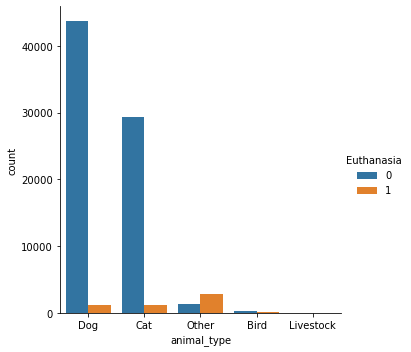

In [75]:
sns.catplot(x="animal_type",hue = 'Euthanasia', data=train, kind='count')

In [ ]:
#looks like other is more likely to get euthinized 

## Question 1.2 what animal type of animals is more likely to get adopted

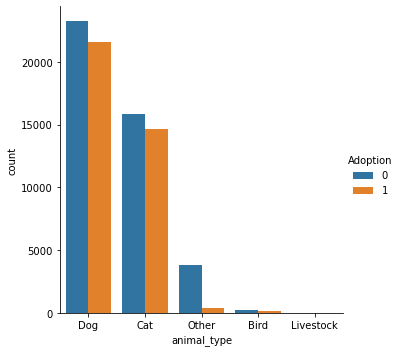

In [76]:
sns.catplot(x="animal_type",hue = 'Adoption', data=train, kind='count')

<Figure size 864x648 with 0 Axes>

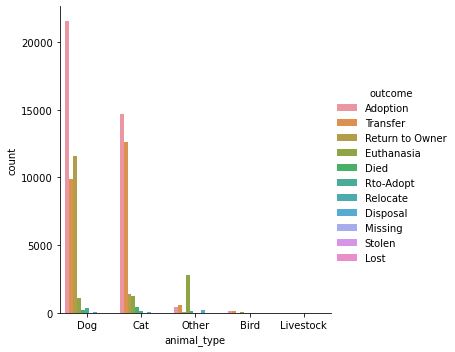

In [81]:
plt.figure(figsize=(12,9))
sns.catplot(x="animal_type",hue = 'outcome', data=train, kind='count')

### Exploring the euthanized breeds 

In [87]:
 df4 = df[['animal_type','outcome','Breed']]
    
df4

,animal_type,outcome,Breed
0,Cat,Rto-Adopt,Domestic Shorthair Mix
1,Dog,Adoption,Chihuahua Shorthair Mix
2,Other,Euthanasia,Raccoon
3,Dog,Adoption,Anatol Shepherd/Labrador Retriever
4,Cat,Transfer,Domestic Shorthair Mix
5,Dog,Adoption,Chihuahua Shorthair Mix
6,Dog,Adoption,American Foxhound/Labrador Retriever
7,Cat,Adoption,Domestic Shorthair Mix
8,Cat,Adoption,Domestic Shorthair Mix
9,Dog,Adoption,Border Collie/Cardigan Welsh Corgi


In [89]:
 df4 = df4.loc[df4['animal_type'] == 'Other']

In [90]:
df4.head()

,animal_type,outcome,Breed
2,Other,Euthanasia,Raccoon
19,Other,Euthanasia,Opossum
27,Other,Euthanasia,Bat Mix
33,Other,Euthanasia,Bat Mix
40,Other,Euthanasia,Bat


In [93]:
df4.Breed.value_counts()

Bat                     1783
Bat Mix                 1754
Raccoon                  587
Raccoon Mix              539
Guinea Pig               355
Rabbit Sh Mix            343
Rabbit Sh                219
Opossum Mix              192
Opossum                  166
Guinea Pig Mix           152
Skunk                    133
Fox                      105
Skunk Mix                105
Squirrel Mix              85
Rat Mix                   74
Fox Mix                   61
Rat                       58
Squirrel                  56
Californian Mix           42
Ferret                    41
Hamster Mix               39
Hamster                   37
Ferret Mix                29
Cold Water                27
Lionhead Mix              24
Californian               22
Rex Mix                   22
Mouse                     21
Coyote                    19
Turtle Mix                19
Snake                     19
Turtle                    17
Snake Mix                 17
Rabbit Lh Mix             15
Lionhead      

In [ ]:
#other consists of diffrent animanls 

In [95]:
df5 = df[['animal_type','outcome','Breed']]
    
df5.head()

,animal_type,outcome,Breed
0,Cat,Rto-Adopt,Domestic Shorthair Mix
1,Dog,Adoption,Chihuahua Shorthair Mix
2,Other,Euthanasia,Raccoon
3,Dog,Adoption,Anatol Shepherd/Labrador Retriever
4,Cat,Transfer,Domestic Shorthair Mix


In [96]:
 df5 = df5.loc[df5['outcome'] == 'Euthanasia']

In [97]:
df5

,animal_type,outcome,Breed
2,Other,Euthanasia,Raccoon
17,Cat,Euthanasia,Domestic Shorthair Mix
19,Other,Euthanasia,Opossum
27,Other,Euthanasia,Bat Mix
33,Other,Euthanasia,Bat Mix
34,Cat,Euthanasia,Domestic Shorthair Mix
40,Other,Euthanasia,Bat
53,Other,Euthanasia,Raccoon
71,Other,Euthanasia,Bat Mix
72,Other,Euthanasia,Bat Mix


In [98]:
df5.value_counts()

animal_type  outcome     Breed                                        
Other        Euthanasia  Bat                                              1573
                         Bat Mix                                          1523
Cat          Euthanasia  Domestic Shorthair Mix                           1343
Other        Euthanasia  Raccoon                                           534
                         Raccoon Mix                                       503
Dog          Euthanasia  Pit Bull Mix                                      490
Cat          Euthanasia  Domestic Shorthair                                421
Dog          Euthanasia  Chihuahua Shorthair Mix                           165
Other        Euthanasia  Opossum Mix                                       158
Cat          Euthanasia  Domestic Medium Hair Mix                          153
Dog          Euthanasia  Labrador Retriever Mix                            148
Other        Euthanasia  Opossum                            

In [99]:
df.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,5,Domestic Shorthair Mix,...,0,1,0,0,0,0,0,1,0,0
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,5,Chihuahua Shorthair Mix,...,0,0,1,0,0,0,0,1,0,0
2,A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,3,Raccoon,...,0,0,0,0,1,0,0,0,0,1
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,7,Anatol Shepherd/Labrador Retriever,...,0,0,1,0,0,0,0,1,0,0
4,A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,8,Domestic Shorthair Mix,...,0,1,0,0,0,0,1,0,0,0


## QUESTION 2 what sex of animals is more likely to get euthi

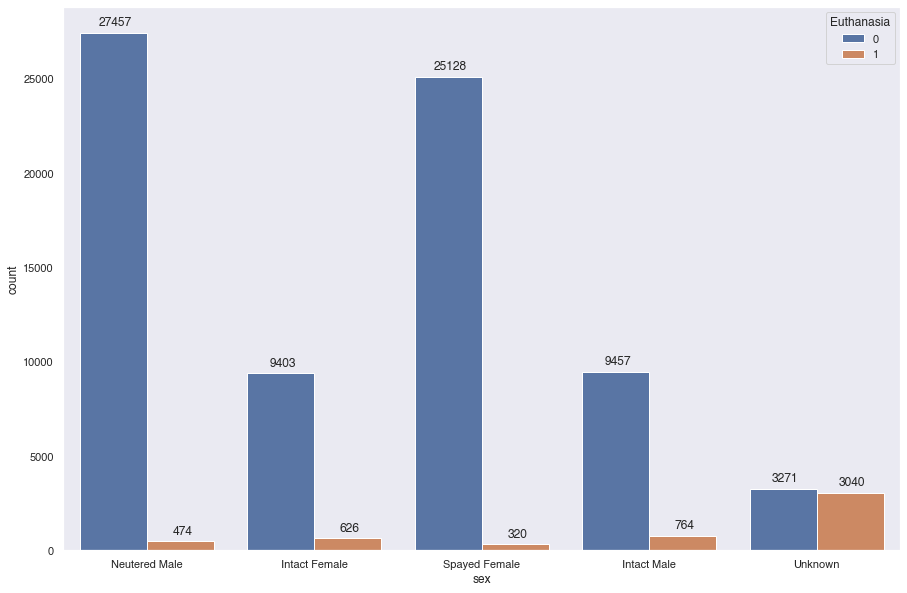

In [140]:
plt.figure(figsize=(15,10))
c = sns.countplot(train['sex'],hue=train['Euthanasia'])

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (2, 10),
                 textcoords = 'offset points')

In [111]:
# ax = sns.countplot(x=train['sex'],
#                    hue=train['Euthanasia'].value_counts(ascending=False).index);

# abs_values = train['Euthanasia'].value_counts(ascending=False).values

# ax.bar_label(container=ax.containers[0], labels=abs_values)

##  Question 3 - Does the age of the animal determine the euthinization

<AxesSubplot:xlabel='age', ylabel='Count'>

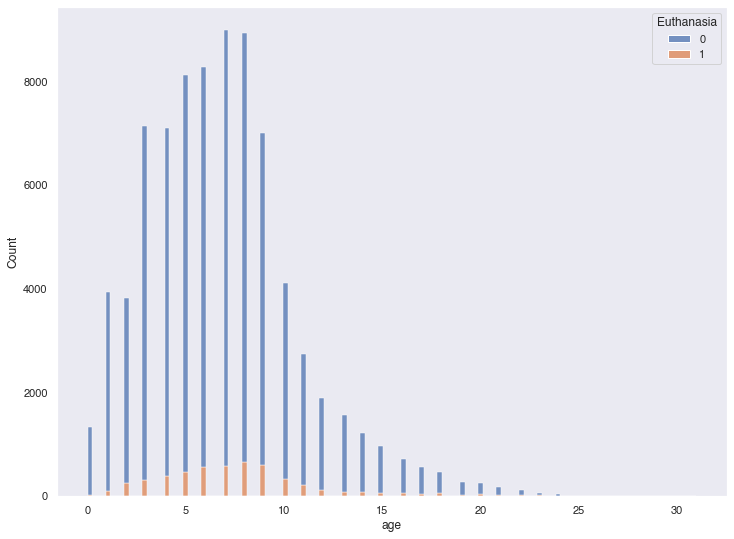

In [138]:
plt.figure(figsize=(12,9))
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": .5})
sns.set(context='notebook', style='dark', font='Helvetica', font_scale=1, color_codes=True, rc=None)
#sns.histplot(x = train['age'] ,hue=train['Euthanasia'], data ='train', multiple="stack")


<AxesSubplot:xlabel='age', ylabel='count'>

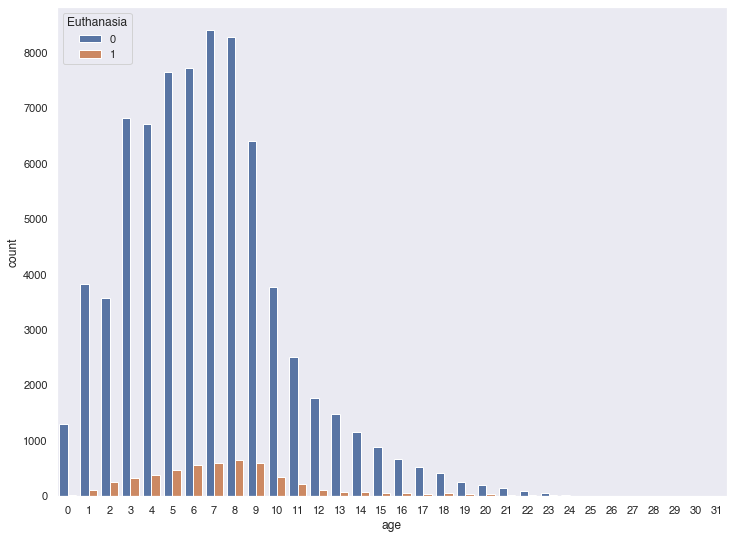

In [139]:
plt.figure(figsize=(12,9))
sns.countplot(x = train['age'] ,hue=train['Euthanasia'])

In [149]:
# looks like animals around the age of 7-9 are more likely to get euthanized 

# question 4 - what are the diffrent outcomes for certain animal types

In [141]:
train.head()

,Animal ID,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
114103,A731965,*Elmer,10/26/2016 12:00:00 AM,Oct 2016,2013-07-30,Adoption,Dog,Neutered Male,9,Pit Bull Mix,...,0,0,1,0,0,0,0,1,0,0
106883,A817802,No_name,06/01/2020 03:26:00 PM,Jun 2020,2019-05-26,Transfer,Dog,Neutered Male,3,Dachshund/Chihuahua Shorthair,...,0,0,1,0,0,0,0,1,0,0
110070,A811391,Holly,01/03/2020 01:08:00 PM,Jan 2020,2011-01-03,Return to Owner,Dog,Intact Female,11,Boxer,...,0,0,1,0,0,1,0,0,0,0
1710,A692819,Spider,03/22/2016 12:56:00 PM,Mar 2016,2012-11-26,Euthanasia,Dog,Neutered Male,10,American Staffordshire Terrier Mix,...,0,0,1,0,0,0,0,1,0,0
47713,A704896,Drogo,06/16/2015 04:59:00 PM,Jun 2015,2013-06-10,Adoption,Dog,Neutered Male,9,Chihuahua Shorthair Mix,...,0,0,1,0,0,0,0,1,0,0


<AxesSubplot:xlabel='outcome', ylabel='count'>

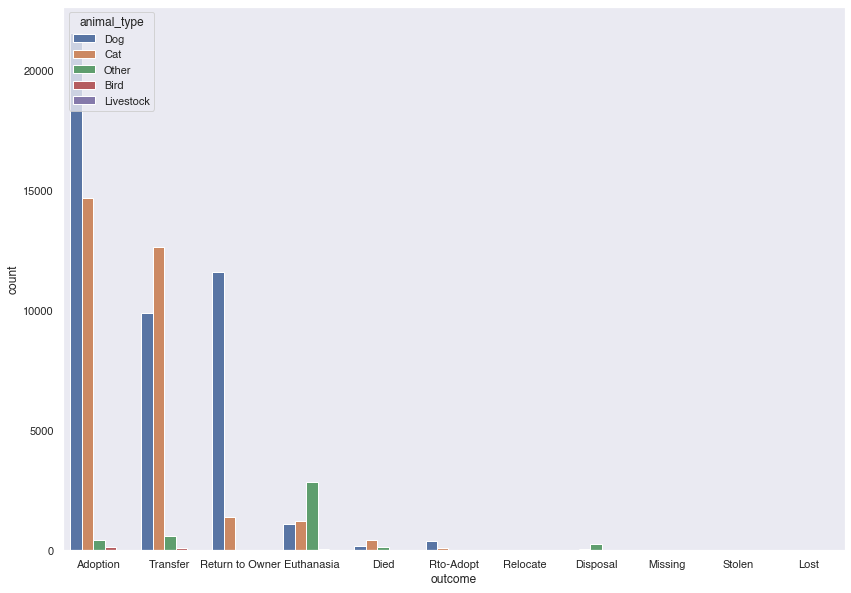

In [147]:
plt.figure(figsize=(14,10))
sns.countplot(x = train['outcome'] ,hue=train['animal_type'])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142750 entries, 0 to 142807
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Animal ID              142750 non-null  object        
 1   Name                   142750 non-null  object        
 2   DateTime               142750 non-null  object        
 3   MonthYear              142750 non-null  object        
 4   DOB                    142750 non-null  datetime64[ns]
 5   outcome                142750 non-null  object        
 6   animal_type            142750 non-null  object        
 7   sex                    142750 non-null  object        
 8   age                    142750 non-null  int64         
 9   Breed                  142750 non-null  object        
 10  Color                  142750 non-null  object        
 11  year                   142750 non-null  int64         
 12  age_bin                140392 non-null  cate